<font size="4"> <center>CMPE 462 Assignment 2 <center>
                <center>Group 9  <center>
                <center>Mustafa Burak Topal- 2021700216 <center>
                <center>Oğuz Arslan- 2022700006 <center>
                <center> 09.05.2023 <center>

Disclaimer: All the computation times are calculated on our computers so they can change but the proportions should remain the same.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import laplacian_kernel,rbf_kernel
from sklearn.model_selection import GridSearchCV
import time


**A)** We chose 30 and 0 as our two classes.

In [3]:

orientations_train=np.load("orientations_train.npy")

indices=[]
y=[]
for i in range(len(orientations_train)):
    if(orientations_train[i]==30 or orientations_train[i]==0):
        indices.append(i)
        y.append(orientations_train[i])

y=np.array(y)/15-1
X=[]
for i in indices:
    a= Image.open("3dshapes_train/"+str(i)+".jpg")
    b= ImageOps.grayscale(a)
    image_array= np.array(b)
    image_array=image_array/255
    # portions of the image we used as feature
    crop_left=image_array[12:30,0:10]  
    crop_right=image_array[12:30,54:64] 
    flattened_crop_left=crop_left.flatten()
    flattened_crop_right=crop_right.flatten()
    flattened_crop=np.concatenate((flattened_crop_left,flattened_crop_right))
    X.append(flattened_crop)
    
X=np.array(X)

orientations_test=np.load("orientations_test.npy")
indices_test=[]
y_test=[]
for i in range(len(orientations_test)):
    if(orientations_test[i]==30 or orientations_test[i]==0):
        indices_test.append(i)
        y_test.append(orientations_test[i])
y_test=np.array(y_test)/15-1
X_test=[]
for i in indices_test:
    a= Image.open("3dshapes_test/"+str(i)+".jpg")
    b= ImageOps.grayscale(a)
    image_array= np.array(b)
    image_array=image_array/255
    crop_left=image_array[12:30,0:10]  
    crop_right=image_array[12:30,54:64] 
    flattened_crop_left=crop_left.flatten()
    flattened_crop_right=crop_right.flatten()
    flattened_crop=np.concatenate((flattened_crop_left,flattened_crop_right))
    X_test.append(flattened_crop)

X_test=np.array(X_test)

We used grid search as our strategy to tune the hyperparameters. There are different parameter grids for lda case because the range of the input values change after lda. "Only c" grid is for soft margin linear model since it has no gamma paramter to tune. "Only gamma" grid is for hard margin polynomial and hard margin rbf models since we can't change C for hard margin.

In [4]:
st=time.time()
param_grid = {'gamma': [0.01, 0.1, 1], 'C': [1, 10, 100]}
param_grid_only_c={"C": [1,10,100]}
param_grid_only_gamma={"gamma": [0.01, 0.1, 1]}
param_grid_lda= {'gamma': [0.00001,0.0001, 0.001], 'C': [1, 10, 100]}
param_grid_lda_only_gamma={"gamma": [0.00001, 0.0001, 0.001]}
svcBinary_Classifier=SVC(kernel="linear")
grid_search= GridSearchCV(svcBinary_Classifier,param_grid_only_c,cv=5)
grid_search.fit(X,y)
et=time.time()
print("Computation time: ", (et-st),"seconds")

Computation time:  0.24616551399230957 seconds


In [5]:
y_prediction = grid_search.predict(X_test)
print("Best parameters: ", grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Best parameters:  {'C': 1}
Test accuracy:  1.0


In [6]:
X_multi=[]

for i in range(10000):
    a= Image.open("3dshapes_train/"+str(i)+".jpg")
    b= ImageOps.grayscale(a)
    image_array= np.array(b)
    image_array=image_array/255
    # portions of the image we used as feature
    crop_left=image_array[12:30,0:10]  
    crop_right=image_array[12:30,54:64] 
    flattened_crop_left=crop_left.flatten()
    flattened_crop_right=crop_right.flatten()
    flattened_crop=np.concatenate((flattened_crop_left,flattened_crop_right))
    X_multi.append(flattened_crop)

X_multi=np.array(X_multi)
y_multi=orientations_train*14/60+7  # to turn classes into 0,1,2,... 14

X_multi_test=[]
for i in range(1000):
    a= Image.open("3dshapes_test/"+str(i)+".jpg")
    b= ImageOps.grayscale(a)
    image_array= np.array(b)
    image_array=image_array/255
    crop_left=image_array[12:30,0:10]  
    crop_right=image_array[12:30,54:64] 
    flattened_crop_left=crop_left.flatten()
    flattened_crop_right=crop_right.flatten()
    flattened_crop=np.concatenate((flattened_crop_left,flattened_crop_right))
    X_multi_test.append(flattened_crop)

X_multi_test=np.array(X_multi_test)
y_multi_test=orientations_test*14/60+7

In [7]:
st=time.time()
svcMulti_Classifier=SVC(kernel="linear")
grid_search= GridSearchCV(svcMulti_Classifier,param_grid_only_c,cv=5)
grid_search.fit(X_multi,y_multi)
et=time.time()

print("Computation time: ", (et-st), "seconds")

Computation time:  6.999747037887573 seconds


Computation time for the multi class case is much higher than the binary class case. This is because when there are 15 class multi classification problem, 15.14/2 binary classifiers are created and trained (one versus one approach). 

In [8]:
y_prediction = grid_search.predict(X_multi_test)
print("Best C value: ", grid_search.best_params_['C'])
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Best C value:  1
Test accuracy:  1.0


**B)  Binary with original features section**

In [9]:
st=time.time()
Soft_margin_b=SVC(kernel="linear")
grid_search= GridSearchCV(Soft_margin_b,param_grid_only_c,cv=5)
grid_search.fit(X,y)

y_prediction = grid_search.predict(X_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_b=SVC(C=1e10,kernel="linear")
Hard_margin_b.fit(X,y)

y_prediction=Hard_margin_b.predict(X_test)
print("No parameters to tune for hard margin linear svm")
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

Soft_margin_poly_b=SVC(kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Soft_margin_poly_b,param_grid,cv=5)
grid_search.fit(X,y)

y_prediction = grid_search.predict(X_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_poly_b=SVC(C=1e10,kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Hard_margin_poly_b,param_grid_only_gamma,cv=5)
grid_search.fit(X,y)

y_prediction = grid_search.predict(X_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Soft_margin_rbf_b=SVC(kernel="rbf")
grid_search= GridSearchCV(Soft_margin_rbf_b,param_grid,cv=5)
grid_search.fit(X,y)

y_prediction = grid_search.predict(X_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_rbf_b=SVC(C=1e10,kernel="rbf")
grid_search= GridSearchCV(Hard_margin_rbf_b,param_grid_only_gamma,cv=5)
grid_search.fit(X,y)

y_prediction = grid_search.predict(X_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

et=time.time()
print("Computation time: ", et-st," seconds")

Best parameters:  {'C': 1}
Test accuracy:  1.0
No parameters to tune for hard margin linear svm
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.01}
Test accuracy:  1.0
Computation time:  1.4568791389465332  seconds


For the laplacian kernel we couldn't use grid search because laplacian is not one of the choices for kernel function in SVMs.
So we decided on gamma ourselves by taking the range of the input values into account.

In [10]:
st=time.time()

gram_train=laplacian_kernel(X,gamma=1)
gram_test=laplacian_kernel(X_test,X,gamma=1)


et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.4849083423614502 seconds


In [11]:
st=time.time()
Soft_margin_laplace_b=SVC(C=1,kernel="precomputed")
Soft_margin_laplace_b.fit(gram_train,y)

Hard_margin_laplace_b=SVC(C=1e10,kernel="precomputed")
Hard_margin_laplace_b.fit(gram_train,y)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.009515523910522461 seconds


In [12]:

y_prediction=Soft_margin_laplace_b.predict(gram_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

y_prediction=Hard_margin_laplace_b.predict(gram_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

Test accuracy:  1.0
Test accuracy:  1.0


**Multi class with original features section**

In [13]:
st=time.time()
Soft_margin_m=SVC(kernel="linear")
grid_search= GridSearchCV(Soft_margin_m,param_grid_only_c,cv=5)
grid_search.fit(X_multi,y_multi)

y_prediction = grid_search.predict(X_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_m=SVC(C=1e10,kernel="linear")
Hard_margin_m.fit(X_multi,y_multi)

y_prediction=Hard_margin_m.predict(X_multi_test)
print("No parameters to tune for hard margin linear svm")
print("Test accuracy: ", accuracy_score(y_prediction,y_multi_test))

Soft_margin_poly_m=SVC(kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Soft_margin_poly_m,param_grid,cv=5)
grid_search.fit(X_multi,y_multi)

y_prediction = grid_search.predict(X_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_poly_m=SVC(C=1e10,kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Hard_margin_poly_m,param_grid_only_gamma,cv=5)
grid_search.fit(X_multi,y_multi)

y_prediction = grid_search.predict(X_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Soft_margin_rbf_m=SVC(kernel="rbf")  
grid_search= GridSearchCV(Soft_margin_rbf_m,param_grid,cv=5)
grid_search.fit(X_multi,y_multi)

y_prediction = grid_search.predict(X_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_rbf_m=SVC(C=1e10,kernel="rbf")
grid_search= GridSearchCV(Hard_margin_rbf_m,param_grid_only_gamma,cv=5)
grid_search.fit(X_multi,y_multi)

y_prediction = grid_search.predict(X_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

et=time.time()
print("Computation time: ", et-st, "seconds")

Best parameters:  {'C': 1}
Test accuracy:  1.0
No parameters to tune for hard margin linear svm
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 1}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.01}
Test accuracy:  1.0
Computation time:  105.75201511383057 seconds


In [14]:
st=time.time()
gram_multi_train=laplacian_kernel(X_multi,gamma=1)
gram_multi_test=laplacian_kernel(X_multi_test,X_multi,gamma=1)
et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  35.219321727752686 seconds


In [15]:
st=time.time()

Soft_margin_laplace_m=SVC(C=1,kernel="precomputed")
Soft_margin_laplace_m.fit(gram_multi_train,y_multi)

Hard_margin_laplace_m=SVC(C=1e10,kernel="precomputed")
Hard_margin_laplace_m.fit(gram_multi_train,y_multi)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.5934453010559082 seconds


In [17]:

y_prediction=Soft_margin_laplace_m.predict(gram_multi_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_multi_test))

y_prediction=Hard_margin_laplace_m.predict(gram_multi_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_multi_test))

Test accuracy:  1.0
Test accuracy:  1.0


**LDA features section**

Here we start to try another feature extraction method, LDA. We used n_components=1 since n_components can be at most 1 due to number of classes being 2.

In [18]:

X_full=[]
for i in indices:
    a= Image.open("3dshapes_train/"+str(i)+".jpg")
    b= ImageOps.grayscale(a)
    image_array= np.array(b)
    image_array=image_array/255
    image_array=image_array.flatten()
    X_full.append(image_array)

st=time.time()

X_full=np.array(X_full)
lda=LDA(n_components=1)
X_lda=lda.fit_transform(X_full,y)

print("Shape before:", X_full.shape, "Shape after:", X_lda.shape, "Max:", np.max(X_lda), "Min:", np.min(X_lda))

et=time.time()
print("Computation time: ", et-st, "seconds")


Shape before: (1358, 4096) Shape after: (1358, 1) Max: 242.3532731499238 Min: -257.6171722018279
Computation time:  4.651427268981934 seconds


Here the range of values in the input changed from 0,1 to -250,250.

In [19]:
X_test_full=[]
for i in indices_test:
    a= Image.open("3dshapes_test/"+str(i)+".jpg")
    b= ImageOps.grayscale(a)
    image_array= np.array(b)
    image_array=image_array/255
    image_array=image_array.flatten()
    X_test_full.append(image_array)

X_test_full=np.array(X_test_full)
X_lda_test=lda.transform(X_test_full)




In [20]:
st=time.time()

svcBinary_Classifier=SVC(kernel="linear")
grid_search= GridSearchCV(svcBinary_Classifier,param_grid_only_c,cv=5)
grid_search.fit(X_lda,y)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.030611276626586914 seconds


In [21]:
y_prediction = grid_search.predict(X_lda_test)
print("Best parameters: ", grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Best parameters:  {'C': 1}
Test accuracy:  1.0


We used n_components = 14 for the multi class case since the number of classes is 15 and 14 is the most we can use in lda.

In [22]:

X_multi_full=[]

for i in range(10000):
    a= Image.open("3dshapes_train/"+str(i)+".jpg")
    b= ImageOps.grayscale(a)
    image_array= np.array(b)
    image_array=image_array/255
    image_array=image_array.flatten()
    X_multi_full.append(image_array)

st=time.time()

X_multi_full=np.array(X_multi_full)
lda_multi=LDA(n_components=14)
X_lda_multi=lda_multi.fit_transform(X_multi_full,y_multi)

print("Shape before:", X_multi_full.shape, "Shape after:", X_lda_multi.shape,"Max:",np.max(X_lda_multi),
      "Min:",np.min(X_lda_multi),)

et=time.time()
print("Computation time: ", et-st, "seconds")


Shape before: (10000, 4096) Shape after: (10000, 14) Max: 7378.758296194236 Min: -10750.072863072619
Computation time:  31.156944274902344 seconds


Here the range of values in the input changed from 0,1 to -10000,7500.

In [23]:

X_multi_test_full=[]
for i in range(1000):
    a= Image.open("3dshapes_test/"+str(i)+".jpg")
    b= ImageOps.grayscale(a)
    image_array= np.array(b)
    image_array=image_array/255
    image_array=image_array.flatten()
    X_multi_test_full.append(image_array)

st=time.time()

X_multi_test_full=np.array(X_multi_test_full)
X_lda_multi_test=lda_multi.transform(X_multi_test_full)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.029881715774536133 seconds


In [24]:
st=time.time()

svcMulti_Classifier=SVC(C=1,kernel="linear")
grid_search= GridSearchCV(svcMulti_Classifier,param_grid_only_c,cv=5)
grid_search.fit(X_lda_multi,y_multi)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.5760605335235596 seconds


In [25]:
y_prediction = grid_search.predict(X_lda_multi_test)
print("Best C value: ", grid_search.best_params_['C'])
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Best C value:  1
Test accuracy:  1.0


**Binary with LDA features section**

In [26]:
st=time.time()

Soft_margin_b=SVC(kernel="linear")
grid_search= GridSearchCV(Soft_margin_b,param_grid_only_c,cv=5)
grid_search.fit(X_lda,y)

y_prediction = grid_search.predict(X_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_b=SVC(C=1e10,kernel="linear")
Hard_margin_b.fit(X_lda,y)

y_prediction=Hard_margin_b.predict(X_lda_test)
print("No parameters to tune for hard margin linear svm")
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

Soft_margin_poly_b=SVC(kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Soft_margin_poly_b,param_grid_lda,cv=5)
grid_search.fit(X_lda,y)

y_prediction = grid_search.predict(X_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_poly_b=SVC(C=1e10,kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Hard_margin_poly_b,param_grid_lda_only_gamma,cv=5)
grid_search.fit(X_lda,y)

y_prediction = grid_search.predict(X_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Soft_margin_rbf_b=SVC(kernel="rbf")  
grid_search= GridSearchCV(Soft_margin_rbf_b,param_grid_lda,cv=5)
grid_search.fit(X_lda,y)

y_prediction = grid_search.predict(X_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_rbf_b=SVC(C=1e10,kernel="rbf")
grid_search= GridSearchCV(Hard_margin_rbf_b,param_grid_lda_only_gamma,cv=5)
grid_search.fit(X_lda,y)

y_prediction = grid_search.predict(X_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

et=time.time()
print("Computation time: ", et-st, "seconds")

Best parameters:  {'C': 1}
Test accuracy:  1.0
No parameters to tune for hard margin linear svm
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'gamma': 1e-05}
Test accuracy:  1.0
Computation time:  0.24451208114624023 seconds


In [27]:
st=time.time()

gram_lda_train=laplacian_kernel(X_lda,gamma=0.1)
gram_lda_test=laplacian_kernel(X_lda_test,X_lda,gamma=0.1)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.022066116333007812 seconds


In [28]:
Soft_margin_laplace_b=SVC(C=1,kernel="precomputed")
Soft_margin_laplace_b.fit(gram_lda_train,y)

Hard_margin_laplace_b=SVC(C=1e10,kernel="precomputed")
Hard_margin_laplace_b.fit(gram_lda_train,y)

SVC(C=10000000000.0, kernel='precomputed')

In [29]:

y_prediction=Soft_margin_laplace_b.predict(gram_lda_test)
print("Test accuracy:", accuracy_score(y_prediction,y_test))

y_prediction=Hard_margin_laplace_b.predict(gram_lda_test)
print("Test accuracy:", accuracy_score(y_prediction,y_test))

Test accuracy: 1.0
Test accuracy: 1.0


**Multi class with LDA features section**

In [30]:
st=time.time()

Soft_margin_m=SVC(kernel="linear")
grid_search= GridSearchCV(Soft_margin_m,param_grid_only_c,cv=5)
grid_search.fit(X_lda_multi,y_multi)

y_prediction = grid_search.predict(X_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_m=SVC(C=1e10,kernel="linear")
Hard_margin_m.fit(X_lda_multi,y_multi)

y_prediction=Hard_margin_m.predict(X_lda_multi_test)
print("No parameters to tune for hard margin linear svm")
print("Test accuracy: ", accuracy_score(y_prediction,y_multi_test))

Soft_margin_poly_m=SVC(kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Soft_margin_poly_m,param_grid_lda,cv=5)
grid_search.fit(X_lda_multi,y_multi)

y_prediction = grid_search.predict(X_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_poly_m=SVC(C=1e10,kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Hard_margin_poly_m,param_grid_lda_only_gamma,cv=5)
grid_search.fit(X_lda_multi,y_multi)

y_prediction = grid_search.predict(X_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Soft_margin_rbf_m=SVC(kernel="rbf")  
grid_search= GridSearchCV(Soft_margin_rbf_m,param_grid_lda,cv=5)
grid_search.fit(X_lda_multi,y_multi)

y_prediction = grid_search.predict(X_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_rbf_m=SVC(C=1e10,kernel="rbf")
grid_search= GridSearchCV(Hard_margin_rbf_m,param_grid_lda_only_gamma,cv=5)
grid_search.fit(X_lda_multi,y_multi)

y_prediction = grid_search.predict(X_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

et=time.time()
print("Computation time: ", et-st, "seconds")

Best parameters:  {'C': 1}
Test accuracy:  1.0
No parameters to tune for hard margin linear svm
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'gamma': 1e-05}
Test accuracy:  1.0
Computation time:  11.91634464263916 seconds


Gamma is this low because the range of inputs is -10000,10000 at this point.

In [31]:
st=time.time()

gram_lda_multi_train=laplacian_kernel(X_lda_multi,gamma=0.001)
gram_lda_multi_test=laplacian_kernel(X_lda_multi_test,X_lda_multi,gamma=0.001) 

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  1.8989741802215576 seconds


In [32]:
st=time.time()

Soft_margin_laplace_m=SVC(C=1,kernel="precomputed")
Soft_margin_laplace_m.fit(gram_lda_multi_train,y_multi)

Hard_margin_laplace_m=SVC(C=1e10,kernel="precomputed")
Hard_margin_laplace_m.fit(gram_lda_multi_train,y_multi)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.33188724517822266 seconds


In [33]:

y_prediction=Soft_margin_laplace_m.predict(gram_lda_multi_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_multi_test))

y_prediction=Hard_margin_laplace_m.predict(gram_lda_multi_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_multi_test))

Test accuracy:  1.0
Test accuracy:  1.0


**C)** First we use PCA with our original features, and then we use PCA with LDA. In the first case we apply PCA after we obtain 360 dimensional features since our features are certain predefined portions of the original images. Had we applied PCA before obtaining our features, we wouldn't be able to get our features since we use the images directly. In the second case, we first apply PCA to 4096 dimensional flattened images then we apply LDA.

In [34]:

pca_variance_check=PCA() 
X_try=pca_variance_check.fit_transform(X)
explained_variance = pca_variance_check.explained_variance_ratio_
print("Portion of the variance captured when we use 2 components (binary):", explained_variance[:2].sum())

pca_variance_check_multi=PCA()
X_multi_try=pca_variance_check_multi.fit_transform(X_multi)

explained_variance_multi=pca_variance_check_multi.explained_variance_ratio_
print("Portion of the variance captured when we use 10 components (multi class):", explained_variance_multi[:10].sum())

Portion of the variance captured when we use 2 components (binary): 0.9869294252673708
Portion of the variance captured when we use 10 components (multi class): 0.9894013668943324


We used n_components=2 in pca for the dataset we use in binary classifcaiton and n_components=10 for the multi class case. We decided on these numbers by checking how much of the variance is captured.

**Binary with original features section**

In [35]:
st=time.time()

pca=PCA(n_components=2) 

X_pca=pca.fit_transform(X)
X_pca_test=pca.transform(X_test)

print("Shape before:", X.shape,"Shape after:", X_pca.shape, "Max", np.max(X_pca), "Min:", np.min(X_pca))
et=time.time()
print("Computation time: ", et-st, "seconds")

Shape before: (1358, 360) Shape after: (1358, 2) Max 5.601714485012762 Min: -5.222541589978096
Computation time:  0.12094283103942871 seconds


After the PCA, the range of the input values changed from 0,1 to -5,5.

In [36]:
st=time.time()

Soft_margin_b=SVC(kernel="linear")
grid_search= GridSearchCV(Soft_margin_b,param_grid_only_c,cv=5)
grid_search.fit(X_pca,y)

y_prediction = grid_search.predict(X_pca_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_b=SVC(C=1e10,kernel="linear")
Hard_margin_b.fit(X_pca,y)

y_prediction=Hard_margin_b.predict(X_pca_test)
print("No parameters to tune for hard margin linear svm")
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

Soft_margin_poly_b=SVC(kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Soft_margin_poly_b,param_grid,cv=5)
grid_search.fit(X_pca,y)

y_prediction = grid_search.predict(X_pca_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_poly_b=SVC(C=1e10,kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Hard_margin_poly_b,param_grid_only_gamma,cv=5)
grid_search.fit(X_pca,y)

y_prediction = grid_search.predict(X_pca_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Soft_margin_rbf_b=SVC(kernel="rbf")
grid_search= GridSearchCV(Soft_margin_rbf_b,param_grid,cv=5)
grid_search.fit(X_pca,y)

y_prediction = grid_search.predict(X_pca_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_rbf_b=SVC(C=1e10,kernel="rbf")
grid_search= GridSearchCV(Hard_margin_rbf_b,param_grid_only_gamma,cv=5)
grid_search.fit(X_pca,y)

y_prediction = grid_search.predict(X_pca_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

et=time.time()
print("Computation time: ", et-st, "seconds")

Best parameters:  {'C': 1}
Test accuracy:  1.0
No parameters to tune for hard margin linear svm
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.01}
Test accuracy:  1.0
Computation time:  0.5337474346160889 seconds


This computation took about 0.8 seconds without PCA and about 0.35 seconds with PCA.

In [37]:
st=time.time()

gram_pca_train=laplacian_kernel(X_pca,gamma=0.1)
gram_pca_test=laplacian_kernel(X_pca_test,X_pca,gamma=0.1)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.02431178092956543 seconds


This computation took about 0.27 seconds without PCA and about 0.02 seconds with PCA.

In [38]:
st=time.time()

Soft_margin_laplace_b=SVC(C=1,kernel="precomputed")
Soft_margin_laplace_b.fit(gram_pca_train,y)

Hard_margin_laplace_b=SVC(C=1e10,kernel="precomputed")
Hard_margin_laplace_b.fit(gram_pca_train,y)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.007966041564941406 seconds


In [39]:

y_prediction=Soft_margin_laplace_b.predict(gram_pca_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

y_prediction=Hard_margin_laplace_b.predict(gram_pca_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

Test accuracy:  1.0
Test accuracy:  1.0


**Multi class with original features section** 

In [40]:
st=time.time()

pca_multi=PCA(n_components=10)
X_pca_multi=pca_multi.fit_transform(X_multi)
X_pca_multi_test=pca_multi.transform(X_multi_test)
print("Shape before:", X_multi.shape, "Shape after:", X_pca_multi.shape, "Max:", np.max(X_pca_multi),
      "Min:", np.min(X_pca_multi))


et=time.time()
print("Computation time: ", et-st, "seconds")

Shape before: (10000, 360) Shape after: (10000, 10) Max: 5.804994811073265 Min: -5.042658538920118
Computation time:  0.11661458015441895 seconds


After the PCA, the range of the input values changed from 0,1 to -5,5.

In [41]:
st=time.time()

Soft_margin_m=SVC(kernel="linear")
grid_search= GridSearchCV(Soft_margin_m,param_grid_only_c,cv=5)
grid_search.fit(X_pca_multi,y_multi)

y_prediction = grid_search.predict(X_pca_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_m=SVC(C=1e10,kernel="linear")
Hard_margin_m.fit(X_pca_multi,y_multi)

y_prediction=Hard_margin_m.predict(X_pca_multi_test)
print("No parameters to tune for hard margin linear svm")
print("Test accuracy: ", accuracy_score(y_prediction,y_multi_test))

Soft_margin_poly_m=SVC(kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Soft_margin_poly_m,param_grid,cv=5)
grid_search.fit(X_pca_multi,y_multi)

y_prediction = grid_search.predict(X_pca_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_poly_m=SVC(C=1e10,kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Hard_margin_poly_m,param_grid_only_gamma,cv=5)
grid_search.fit(X_pca_multi,y_multi)

y_prediction = grid_search.predict(X_pca_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Soft_margin_rbf_m=SVC(kernel="rbf")  
grid_search= GridSearchCV(Soft_margin_rbf_m,param_grid,cv=5)
grid_search.fit(X_pca_multi,y_multi)

y_prediction = grid_search.predict(X_pca_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_rbf_m=SVC(C=1e10,kernel="rbf")
grid_search= GridSearchCV(Hard_margin_rbf_m,param_grid_only_gamma,cv=5)
grid_search.fit(X_pca_multi,y_multi)

y_prediction = grid_search.predict(X_pca_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))


et=time.time()
print("Computation time: ", et-st, "seconds")

Best parameters:  {'C': 10}
Test accuracy:  1.0
No parameters to tune for hard margin linear svm
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 0.1}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.01}
Test accuracy:  1.0
Best parameters:  {'C': 10, 'gamma': 1}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.01}
Test accuracy:  1.0
Computation time:  42.58551812171936 seconds


This computation took about 60 seconds without PCA and about 23 seconds with PCA.

In [42]:
st=time.time()

gram_pca_multi_train=laplacian_kernel(X_pca_multi,gamma=0.1)
gram_pca_multi_test=laplacian_kernel(X_pca_multi_test,X_pca_multi,gamma=0.1)


et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  1.7665109634399414 seconds


This computation took about 20 seconds without PCA and about 1.5 seconds with PCA.

In [43]:
st=time.time()

Soft_margin_laplace_m=SVC(C=1,kernel="precomputed")
Soft_margin_laplace_m.fit(gram_pca_multi_train,y_multi)

Hard_margin_laplace_m=SVC(C=1e10,kernel="precomputed")
Hard_margin_laplace_m.fit(gram_pca_multi_train,y_multi)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.37861204147338867 seconds


In [44]:

y_prediction=Soft_margin_laplace_m.predict(gram_pca_multi_test)
print("Test accuracy:", accuracy_score(y_prediction,y_multi_test))

y_prediction=Hard_margin_laplace_m.predict(gram_pca_multi_test)
print("Test accuracy:", accuracy_score(y_prediction,y_multi_test))

Test accuracy: 1.0
Test accuracy: 1.0


**Binary with LDA features section**

Again we used variances to determine the number of components. 20 seemed as a reasonable choice.

In [45]:

pca_full_try=PCA()
X_full_try=pca_full_try.fit_transform(X_full)

X_test_full_try=pca_full_try.transform(X_test_full)
print("Portion of the variance captured when we use 20 components (binary):", pca_full_try.explained_variance_ratio_[:20].sum())


Portion of the variance captured when we use 20 components (binary): 0.975184153692097


In [46]:
st=time.time()

pca_full=PCA(n_components=20)
X_pca_full=pca_full.fit_transform(X_full)
X_pca_test_full=pca_full.transform(X_test_full)

print("Shape before:", X_full.shape, "Shape after:", X_pca_full.shape, "Max:", np.max(X_pca_full), "Min:", np.min(X_pca_full))
et=time.time()
print("Computation time: ", et-st, "seconds")

Shape before: (1358, 4096) Shape after: (1358, 20) Max: 14.723148338003002 Min: -13.38738026080658
Computation time:  0.2596151828765869 seconds


After the PCA input dimension decreased from 4096 to 20 and the range of the input values changed from 0,1 to -15,15.

In [47]:
st=time.time()

lda=LDA(n_components=1)

X_pca_lda=lda.fit_transform(X_pca_full,y)
X_pca_lda_test=lda.transform(X_pca_test_full)
print("Shape before:", X_pca_full.shape, "Shape after:", X_pca_lda.shape, "Max:", np.max(X_pca_lda), "Min:", np.min(X_pca_lda))

et=time.time()
print("Computation time: ", et-st, "seconds")

Shape before: (1358, 20) Shape after: (1358, 1) Max: 20.308623162556337 Min: -18.210338576686148
Computation time:  0.013015270233154297 seconds


This computation took about 2 seconds without PCA and 0.13 seconds with PCA. (We took computation time of the PCA into account.)

After the LDA input dimension decreased from 20 to 1 (#of classes -1) and the range of the input values changed from -15,15 to -20,20.

In [48]:
st=time.time()

Soft_margin_b=SVC(kernel="linear")
grid_search= GridSearchCV(Soft_margin_b,param_grid_only_c,cv=5)
grid_search.fit(X_pca_lda,y)

y_prediction = grid_search.predict(X_pca_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_b=SVC(C=1e10,kernel="linear")
Hard_margin_b.fit(X_pca_lda,y)

y_prediction=Hard_margin_b.predict(X_pca_lda_test)
print("No parameters to tune for hard margin linear svm")
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

Soft_margin_poly_b=SVC(kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Soft_margin_poly_b,param_grid_lda,cv=5)
grid_search.fit(X_pca_lda,y)

y_prediction = grid_search.predict(X_pca_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_poly_b=SVC(C=1e10,kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Hard_margin_poly_b,param_grid_lda_only_gamma,cv=5)
grid_search.fit(X_pca_lda,y)

y_prediction = grid_search.predict(X_pca_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Soft_margin_rbf_b=SVC(kernel="rbf")
grid_search= GridSearchCV(Soft_margin_rbf_b,param_grid_lda,cv=5)
grid_search.fit(X_pca_lda,y)

y_prediction = grid_search.predict(X_pca_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

Hard_margin_rbf_b=SVC(C=1e10,kernel="rbf")
grid_search= GridSearchCV(Hard_margin_rbf_b,param_grid_lda_only_gamma,cv=5)
grid_search.fit(X_pca_lda,y)

y_prediction = grid_search.predict(X_pca_lda_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_test))

et=time.time()
print("Computation time: ", et-st, "seconds")

Best parameters:  {'C': 1}
Test accuracy:  1.0
No parameters to tune for hard margin linear svm
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'C': 1, 'gamma': 1e-05}
Test accuracy:  1.0
Best parameters:  {'gamma': 1e-05}
Test accuracy:  1.0
Computation time:  0.3918471336364746 seconds


This computation took about 0.15 seconds without PCA and about 0.25 seconds with PCA. PCA doesn't improve the time here because dimension after LDA is 1 with or without PCA.

In [49]:
st=time.time()

gram_pca_lda_train=laplacian_kernel(X_pca_lda,gamma=0.1)
gram_pca_lda_test=laplacian_kernel(X_pca_lda_test,X_pca_lda,gamma=0.1)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.022034645080566406 seconds


In [50]:
st=time.time()

Soft_margin_laplace_b=SVC(C=1,kernel="precomputed")
Soft_margin_laplace_b.fit(gram_pca_lda_train,y)

Hard_margin_laplace_b=SVC(C=1e10,kernel="precomputed")
Hard_margin_laplace_b.fit(gram_pca_lda_train,y)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.008513212203979492 seconds


In [51]:

y_prediction=Soft_margin_laplace_b.predict(gram_pca_lda_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

y_prediction=Hard_margin_laplace_b.predict(gram_pca_lda_test)
print("Test accuracy: ", accuracy_score(y_prediction,y_test))

Test accuracy:  1.0
Test accuracy:  1.0


We used variances to determine the number of components for PCA in the multi class case too. 30 seemed adequate.

In [52]:
pca_multi_full_try=PCA()
X_multi_full_try=pca_multi_full_try.fit_transform(X_multi_full)

X_multi_test_full_try=pca_multi_full_try.transform(X_multi_test_full)
print("Portion of the variance captured when we use 30 components (multi class):",
      pca_multi_full_try.explained_variance_ratio_[:30].sum())


Portion of the variance captured when we use 30 components (multi class): 0.9725180088737144


In [53]:
st=time.time()

pca_multi_full=PCA(n_components=30)
X_pca_multi_full=pca_multi_full.fit_transform(X_multi_full)
X_pca_multi_test_full=pca_multi_full.transform(X_multi_test_full)

et=time.time()
print("Computation time: ", et-st, "seconds")

print("Shape before:", X_multi_full.shape, "Shape after:", X_pca_multi_full.shape,
      "Max:", np.max(X_pca_multi_full), "Min:", np.min(X_pca_multi_full))

Computation time:  0.979259729385376 seconds
Shape before: (10000, 4096) Shape after: (10000, 30) Max: 16.299421201556697 Min: -15.037098762755994


After the PCA input dimension decreased from 4096 to 30 and the range of the input values changed from 0,1 to -15,15.

In [54]:
st=time.time()

lda=LDA(n_components=14)
print(X_pca_multi_full.shape)
X_pca_lda_multi=lda.fit_transform(X_pca_multi_full,y_multi)
X_pca_lda_multi_test=lda.transform(X_pca_multi_test_full)
print(X_pca_lda_multi.shape,np.max(X_pca_lda_multi),np.min(X_pca_lda_multi))

et=time.time()
print("Computation time: ", et-st, "seconds")

(10000, 30)
(10000, 14) 32.61142529804119 -30.012536973462076
Computation time:  0.041652679443359375 seconds


This computation took about 20 seconds without PCA and about 0.82 seconds with PCA. (We took computation time of the PCA into account.)

After the LDA input dimension decreased from 30 to 14 (#of classes -1) and the range of the input values changed from -15,15 to -30,30.

In [55]:
st=time.time()

Soft_margin_m=SVC(kernel="linear")
grid_search= GridSearchCV(Soft_margin_m,param_grid_only_c,cv=5)
grid_search.fit(X_pca_lda_multi,y_multi)

y_prediction = grid_search.predict(X_pca_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_m=SVC(C=1e10,kernel="linear")
Hard_margin_m.fit(X_pca_lda_multi,y_multi)

y_prediction=Hard_margin_m.predict(X_pca_lda_multi_test)
print("No parameters to tune for hard margin linear svm")
print("Test accuracy: ", accuracy_score(y_prediction,y_multi_test))

Soft_margin_poly_m=SVC(kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Soft_margin_poly_m,param_grid_lda,cv=5)
grid_search.fit(X_pca_lda_multi,y_multi)

y_prediction = grid_search.predict(X_pca_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_poly_m=SVC(C=1e10,kernel="poly",degree=3,coef0=1)
grid_search= GridSearchCV(Hard_margin_poly_m,param_grid_lda_only_gamma,cv=5)
grid_search.fit(X_pca_lda_multi,y_multi)

y_prediction = grid_search.predict(X_pca_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Soft_margin_rbf_m=SVC(kernel="rbf")  
grid_search= GridSearchCV(Soft_margin_rbf_m,param_grid_lda,cv=5)
grid_search.fit(X_pca_lda_multi,y_multi)

y_prediction = grid_search.predict(X_pca_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

Hard_margin_rbf_m=SVC(C=1e10,kernel="rbf")
grid_search= GridSearchCV(Hard_margin_rbf_m,param_grid_lda_only_gamma,cv=5)
grid_search.fit(X_pca_lda_multi,y_multi)

y_prediction = grid_search.predict(X_pca_lda_multi_test)
print("Best parameters: ",grid_search.best_params_)
print("Test accuracy: ",accuracy_score(y_prediction, y_multi_test))

et=time.time()
print("Computation time: ", et-st, "seconds")

Best parameters:  {'C': 1}
Test accuracy:  1.0
No parameters to tune for hard margin linear svm
Test accuracy:  1.0
Best parameters:  {'C': 100, 'gamma': 0.001}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.001}
Test accuracy:  1.0
Best parameters:  {'C': 10, 'gamma': 0.001}
Test accuracy:  1.0
Best parameters:  {'gamma': 0.001}
Test accuracy:  1.0
Computation time:  65.20378088951111 seconds


This computation took about 6 seconds without PCA and about 33 seconds with PCA. The main reason for longer time is that the parameter grids are not that well suited for -30,30 range.

In [56]:
st=time.time()
gram_pca_lda_multi_train=laplacian_kernel(X_pca_lda_multi,gamma=0.05)
gram_pca_lda_multi_test=laplacian_kernel(X_pca_lda_multi_test,X_pca_lda_multi,gamma=0.05)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  1.9367196559906006 seconds


In [57]:
st=time.time()

Soft_margin_laplace_m=SVC(C=1,kernel="precomputed")
Soft_margin_laplace_m.fit(gram_pca_lda_multi_train,y_multi)

Hard_margin_laplace_m=SVC(C=1e10,kernel="precomputed")
Hard_margin_laplace_m.fit(gram_pca_lda_multi_train,y_multi)

et=time.time()
print("Computation time: ", et-st, "seconds")

Computation time:  0.5476057529449463 seconds


In [58]:

y_prediction=Soft_margin_laplace_m.predict(gram_pca_lda_multi_test)
print("Test accuracy:", accuracy_score(y_prediction,y_multi_test))

y_prediction=Hard_margin_laplace_m.predict(gram_pca_lda_multi_test)
print("Test accuracy:", accuracy_score(y_prediction,y_multi_test))

Test accuracy: 1.0
Test accuracy: 1.0


In conclusion, using PCA beforehand improves the computation times in general. 

**Question 2)**

**A)**

Since the weights of the normal distributions are equal to 1/4 we first choose a random number between 0,3 inclusively. Then we choose a random sample from the bivariate normal distribution that is correspondent to the first number we chose. Different colors represent different distributions.

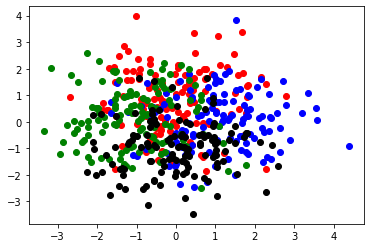

In [59]:
np.random.seed(42)
means=[[0,1],[1,0],[-1,0],[0,-1]]
cov=[[1,0],[0,1]]

samples_x=[]
samples_y=[]
labels=[]
for i in range(500):
    a=np.random.choice(list(range(4)),1)
    rv = multivariate_normal.rvs(means[a[0]], cov, size=1)
    samples_x.append(rv[0])
    samples_y.append(rv[1])
    labels.append(a[0])
samples=np.column_stack((samples_x,samples_y))
colors=["red","blue","green","black"]
for i in range(4):
    indices=list(filter(lambda x:labels[x]==i,list(range(len(samples_x)))))
    plot_x=[samples_x[j] for j in indices]
    plot_y=[samples_y[j] for j in indices]
    plt.scatter(plot_x,plot_y,c=colors[i])

plt.show()

We used multiple runs technique to decrease the effect of initialization of centroids. We run the k-means for an amount given in "runs" parameter and return the best clustering in terms of SSE(sum of squared errors). There will be 2 plots after the below cell is run. First one is colored to show original distributions and the second one is colored to show clustering.

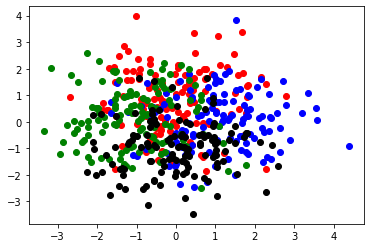

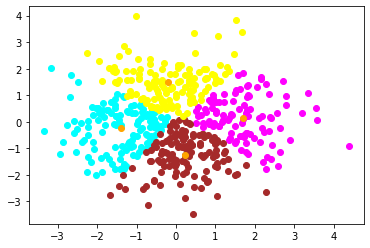

In [60]:



def dist(x,y):
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
 

def k_means(points,k,runs):
    final_assignments=[]
    final_centroids=[]
    for run in range(runs):
        changed=True
        centroids=points[np.random.choice(points.shape[0], k, replace=False)]
        assignments=[0 for i in range(len(points))]
        assignments_old=[]
        min_sse=1e10
        
        while(changed==True):

            assignments_old=assignments.copy()
            for j in range(len(points)):
                distance_to_centroids=[dist(points[j],centroids[i]) for i in range(k)]
                assignments[j]=np.argmin(distance_to_centroids)

            if (assignments==assignments_old):
                changed=False

           
            for a in range(k):
                summ=(0,0)
                count=0
                for b in range(len(points)):
                    if(assignments[b]==a):
                        summ+=points[b]
                        count+=1
                centroids[a]=summ/count
        curr_sse=0
        for m in range(len(points)):
            curr_sse+=dist(points[m],centroids[assignments[m]])**2
        if(curr_sse < min_sse):
            curr_sse = min_sse
            final_assignments = assignments
            final_centroids = centroids
        
    return [final_assignments, final_centroids]

output=k_means(samples,4,20)
assignments=output[0]


colors=["red","blue","green","black"]
for i in range(4):
    indices=list(filter(lambda x:labels[x]==i,list(range(len(samples_x)))))
    plot_x=[samples_x[j] for j in indices]
    plot_y=[samples_y[j] for j in indices]
    plt.scatter(plot_x,plot_y,c=colors[i])

plt.show()

colors2=["cyan","magenta","brown","yellow"]
for i in range(4):
    indices=list(filter(lambda x:assignments[x]==i,list(range(len(samples_x)))))
    plot_x=[samples_x[j] for j in indices]
    plot_y=[samples_y[j] for j in indices]
    plt.scatter(plot_x,plot_y,c=colors2[i])

plot_x=[output[1][i][0] for i in range(4)]
plot_y=[output[1][i][1] for i in range(4)]
plt.scatter(plot_x,plot_y,c="orange")

plt.show()



As we can see, the clustering can't recreate the original distributions. However, this is normal because original distributions are not distinguishable. Let's say we have a point (0.5,0.5) which can come from the first distribution or the second distribution equally likely. If we reduce the covariance matrix to 1/10th of the original, we get distinguishable distributions which we implement below.

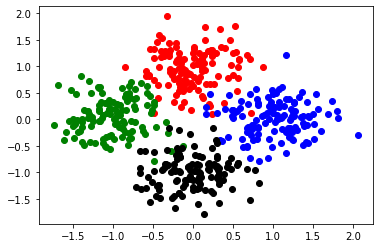

In [61]:
np.random.seed(42)
means=[[0,1],[1,0],[-1,0],[0,-1]]
cov=[[0.1,0],[0,0.1]]

samples_x=[]
samples_y=[]
labels=[]
for i in range(500):
    a=np.random.choice(list(range(4)),1)
    rv = multivariate_normal.rvs(means[a[0]], cov, size=1)
    samples_x.append(rv[0])
    samples_y.append(rv[1])
    labels.append(a[0])
samples=np.column_stack((samples_x,samples_y))
colors=["red","blue","green","black"]
for i in range(4):
    indices=list(filter(lambda x:labels[x]==i,list(range(len(samples_x)))))
    plot_x=[samples_x[j] for j in indices]
    plot_y=[samples_y[j] for j in indices]
    plt.scatter(plot_x,plot_y,c=colors[i])

plt.show()

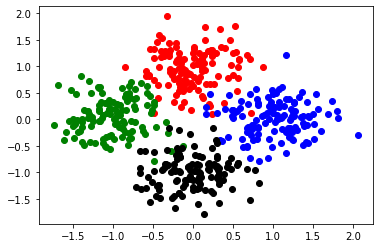

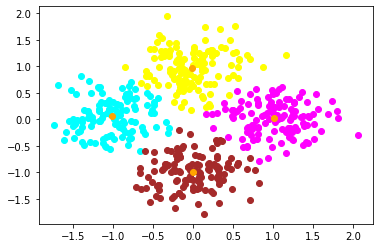

In [62]:
output=k_means(samples,4,20)
assignments=output[0]


colors=["red","blue","green","black"]
for i in range(4):
    indices=list(filter(lambda x:labels[x]==i,list(range(len(samples_x)))))
    plot_x=[samples_x[j] for j in indices]
    plot_y=[samples_y[j] for j in indices]
    plt.scatter(plot_x,plot_y,c=colors[i])

plt.show()

colors2=["cyan","magenta","brown","yellow"]
for i in range(4):
    indices=list(filter(lambda x:assignments[x]==i,list(range(len(samples_x)))))
    plot_x=[samples_x[j] for j in indices]
    plot_y=[samples_y[j] for j in indices]
    plt.scatter(plot_x,plot_y,c=colors2[i])

plot_x=[output[1][i][0] for i in range(4)]
plot_y=[output[1][i][1] for i in range(4)]
plt.scatter(plot_x,plot_y,c="orange")

plt.show()

As we can see, the clustering can recreate the original distributions almost exactly. Even the centroids are very close to the actual means.